In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from collections import namedtuple
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

#### PreProcessing Iris

In [368]:
IRIS = pd.read_csv("../iris.csv")
IRIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [369]:
IRIS.columns = list(IRIS.columns[:-1]) + ['Labels']
for column in IRIS.columns:
    if(column == 'Labels'): break
    print(f"{column} Stats\nmean:{IRIS[column].mean()} std:{IRIS[column].std()} max:{IRIS[column].max()} min:{IRIS[column].min()}")

sepal_length Stats
mean:5.843333333333334 std:0.828066127977863 max:7.9 min:4.3
sepal_width Stats
mean:3.0540000000000003 std:0.4335943113621737 max:4.4 min:2.0
petal_length Stats
mean:3.758666666666666 std:1.7644204199522626 max:6.9 min:1.0
petal_width Stats
mean:1.1986666666666668 std:0.7631607417008411 max:2.5 min:0.1


In [370]:
IRIS_y = IRIS['Labels']
IRIS_X = IRIS.drop(columns= 'Labels')

#### PreProcessing Diabetes

In [371]:
DIAB = pd.read_csv('diabetes.csv')
DIAB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [372]:
DIAB.columns = list(DIAB.columns[:-1]) + ['Labels']
for column in DIAB.columns:
    if(column == 'Labels'): break
    print(f"{column} Stats\nmean:{DIAB[column].mean()} std:{DIAB[column].std()} max:{DIAB[column].max()} min:{DIAB[column].min()}")

Pregnancies Stats
mean:3.8450520833333335 std:3.3695780626988694 max:17 min:0
Glucose Stats
mean:120.89453125 std:31.97261819513622 max:199 min:0
BloodPressure Stats
mean:69.10546875 std:19.355807170644777 max:122 min:0
SkinThickness Stats
mean:20.536458333333332 std:15.952217567727637 max:99 min:0
Insulin Stats
mean:79.79947916666667 std:115.24400235133817 max:846 min:0
BMI Stats
mean:31.992578124999998 std:7.884160320375446 max:67.1 min:0.0
DiabetesPedigreeFunction Stats
mean:0.47187630208333325 std:0.3313285950127749 max:2.42 min:0.078
Age Stats
mean:33.240885416666664 std:11.760231540678685 max:81 min:21


In [373]:
DIAB_y = DIAB['Labels']
DIAB_X = DIAB.drop(columns= 'Labels')

### Naive Bayes
Gaussian for continous data distribution

In [374]:
class NaiveBayes:
    LabelVal = namedtuple('LabelVal', ['Label', 'count'])
    FeatureVal = namedtuple('FeatureVal', ['Feature', 'Mu', 'Std'])

    def __init__(self, dataframe: pd.DataFrame):
        self.gaussian_data = {}
        self.counts = len(dataframe)

        for label in dataframe['Labels'].unique():
            localframe = dataframe[dataframe['Labels'] == label]
            key = self.LabelVal(label, len(localframe))
            self.gaussian_data[key] = []
            for feature in dataframe.columns:
                if(feature == 'Labels'): break
                self.gaussian_data[key].append(self.FeatureVal(feature, localframe[feature].mean(), 
                                                            localframe[feature].std()))

    def print_data(self):
        for key in self.gaussian_data:
            print(key, self.gaussian_data[key])

    def test_database(self, test_dataframe: pd.DataFrame):
        test_prediction = []

        for idx, datarow in test_dataframe.iterrows():
            datatuple = pd.Series(datarow)
            prediction = self.predict(datatuple)
            test_prediction.append(prediction['Label'])
        return test_prediction


    def predict(self, datarow: pd.Series, print_class_prob= False):
        prediction_Prob = {'Label': [], 'P': []}

        for key in self.gaussian_data:
            label_data = self.gaussian_data[key]
            prediction = 1.0
            for data, feature_tuple in zip(datarow, label_data):
                prediction = prediction * self.gaussianProb(data, feature_tuple.Mu, feature_tuple.Std)
            prediction *= key.count / self.counts
            prediction_Prob['Label'].append(key.Label)
            prediction_Prob['P'].append(prediction)
        prediction_Prob = pd.DataFrame.from_dict(prediction_Prob)
        
        if(print_class_prob):
            print(prediction_Prob)
        return prediction_Prob.iloc[prediction_Prob['P'].idxmax()]

    def gaussianProb(self, x, mu, std):
        return 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mu) ** 2 / (2 * std ** 2))

NB_IRIS = NaiveBayes(IRIS)
data = IRIS.iloc[7]
print(data)
NB_IRIS.predict(data, True)['Label']

sepal_length       5.0
sepal_width        3.4
petal_length       1.5
petal_width        0.2
Labels          setosa
Name: 7, dtype: object
        Label             P
0      setosa  3.036604e+00
1  versicolor  4.250122e-17
2   virginica  2.495826e-24


'setosa'

#### Iris dataset

In [375]:
TS = 0.4
X_train, X_test, y_train, y_test = train_test_split(IRIS_X, IRIS_y, test_size= TS)

IRIS_train= pd.concat([X_train, y_train], axis= 1)
IRIS_train.head()

,sepal_length,sepal_width,petal_length,petal_width,Labels
111,6.4,2.7,5.3,1.9,virginica
34,4.9,3.1,1.5,0.1,setosa
126,6.2,2.8,4.8,1.8,virginica
147,6.5,3.0,5.2,2.0,virginica
146,6.3,2.5,5.0,1.9,virginica


In [376]:
NB_IRIS = NaiveBayes(IRIS_train)
y_pred = NB_IRIS.test_database(X_test)

count = 0
for a,b in zip(y_pred, y_test):
    if(a != b): count += 1
print(count)

1


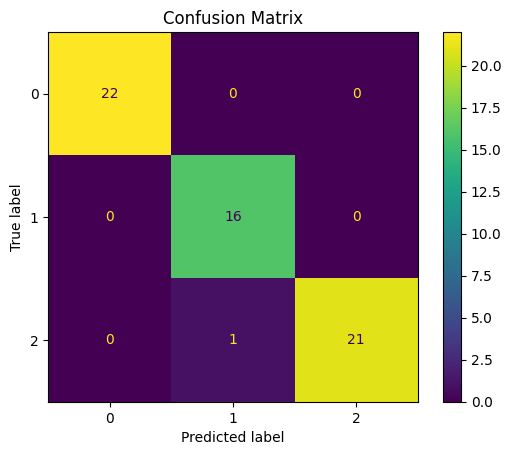

In [377]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [378]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        22
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.95      0.98        22

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [379]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 60 points : 1


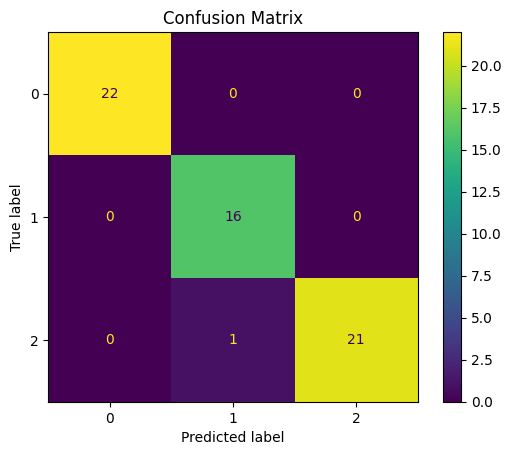

In [380]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [381]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        22
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.95      0.98        22

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



### Diabetes dataset

In [382]:
X_train, X_test, y_train, y_test = train_test_split(DIAB_X, DIAB_y, test_size= TS)

DIAB_train= pd.concat([X_train, y_train], axis= 1)
DIAB_train.columns = list(DIAB.columns[:-1]) + ['Labels']
DIAB_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Labels
622,6,183,94,0,0,40.8,1.461,45,0
18,1,103,30,38,83,43.3,0.183,33,0
337,5,115,76,0,0,31.2,0.343,44,1
560,6,125,76,0,0,33.8,0.121,54,1
605,1,124,60,32,0,35.8,0.514,21,0


In [383]:
NB_DIAB = NaiveBayes(DIAB_train)
y_pred = NB_DIAB.test_database(X_test)

count = 0
for a,b in zip(y_pred, y_test):
    if(a != b): count += 1
print(count)

69


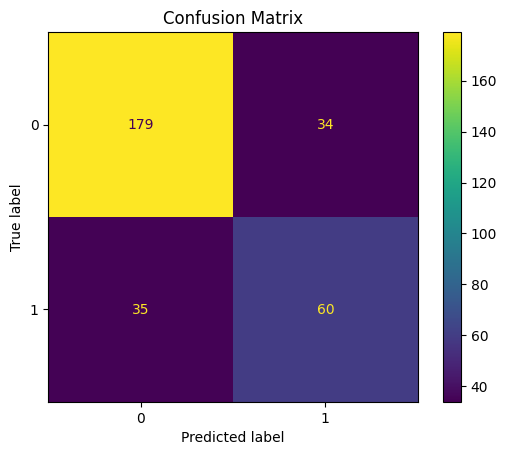

In [384]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [385]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       213
           1       0.64      0.63      0.63        95

    accuracy                           0.78       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.78      0.78      0.78       308



In [386]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 308 points : 69


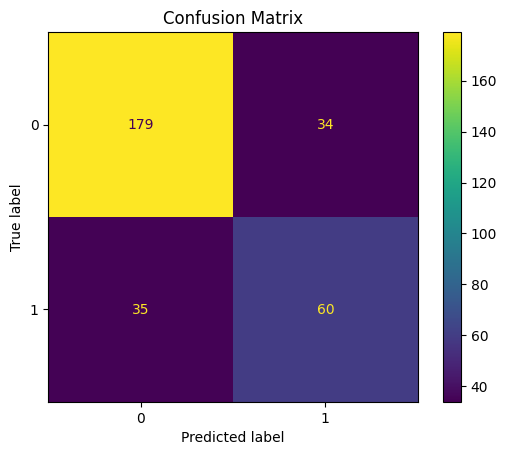

In [387]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [388]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       213
           1       0.64      0.63      0.63        95

    accuracy                           0.78       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.78      0.78      0.78       308

